## Investigating the multiple channels on the oscilloscope data output

In [93]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

In [94]:
a = [1,2,3]
a[-1]

3

In [95]:
data_dir = "/Users/hayden/Desktop/HRMT64 data"
if not os.path.exists(data_dir):
    raise ValueError("Error: specified data directory doesn't exist")

In [96]:
data_path = os.path.join(data_dir, "SCOPE1/C1_SCOPE1_00013.txt")
if not os.path.exists(data_path):
    raise ValueError("Error: cannot find data")

In [97]:
df = pd.read_csv(data_path)
columns_list = df.columns.values.tolist()

channel1_voltages = [float(columns_list[-2])] # the column header is the first data point :(
channel1_voltages += df[columns_list[-2]] # add the rest of the column to the 'scope data

channel2_voltages = [float(columns_list[-1])] # the column header is the first data point :(
channel2_voltages += df[columns_list[-1]] # add the rest of the column to the 'scope data

corr_voltages = np.subtract(channel2_voltages, channel1_voltages)

# TIME INTERVAL IN SECONDS
dt = df[columns_list[1]][0]
# NO OF RECORDING POINTS
N = int(columns_list[1])

# Initialize times array using information about the timestep and the number of sampling points
times = np.multiply(np.arange(0, N-1, step=1), dt)

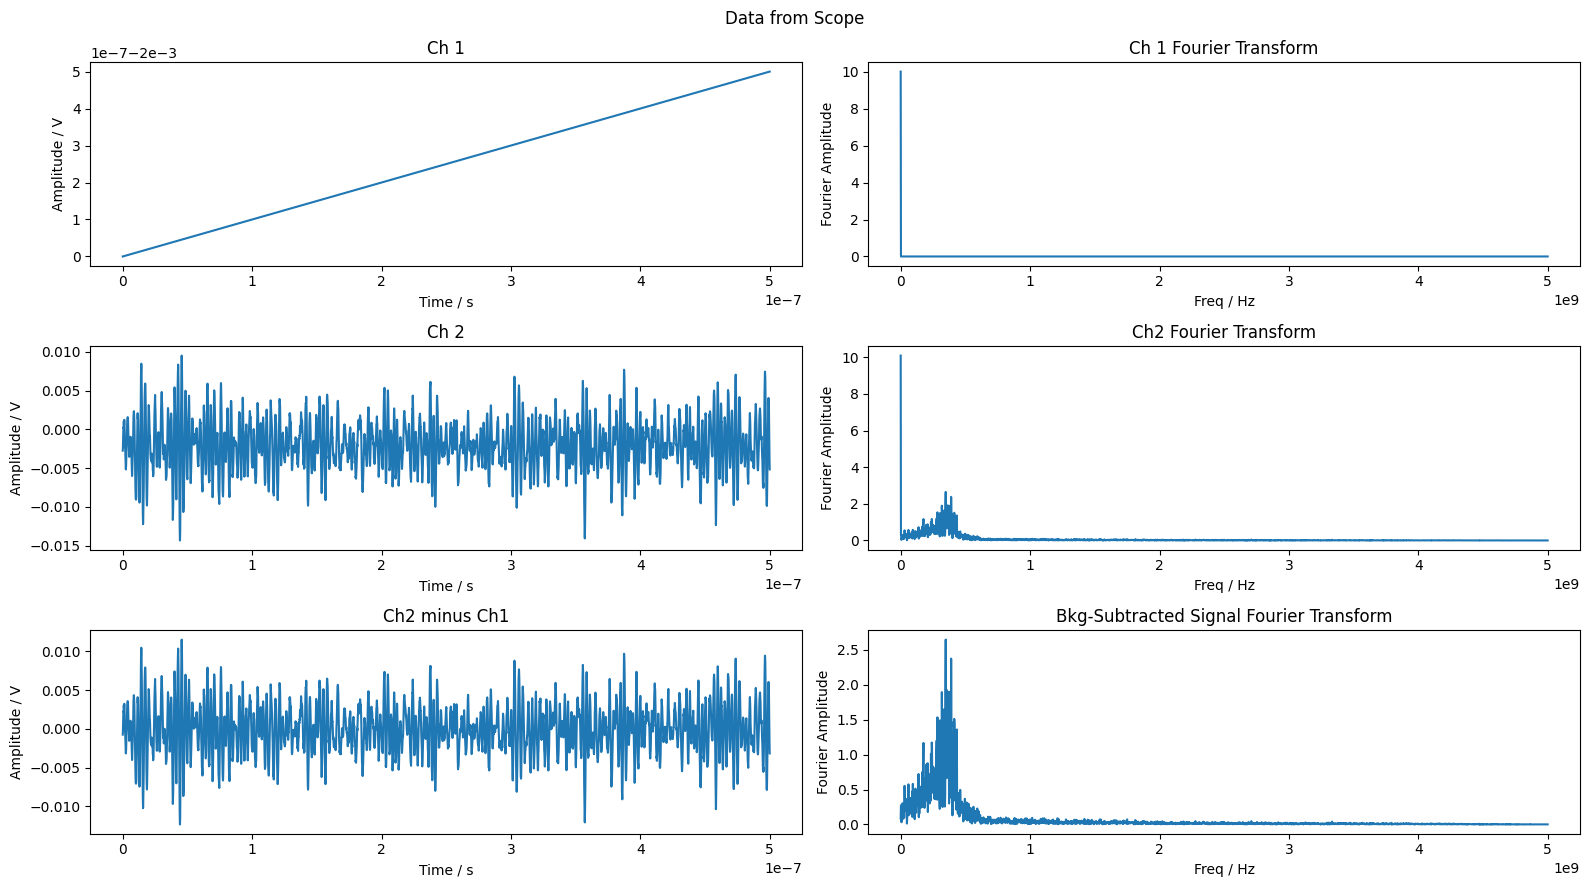

In [107]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(16,9))

#############
# CHANNEL 1 #
#############

axs[0, 0].plot(times, channel1_voltages)
axs[0, 0].set_ylabel("Amplitude / V")
axs[0, 0].set_xlabel("Time / s")
axs[0, 0].set_title("Ch 1")

freq1 = rfftfreq(n=N-1, d=dt)
fftvol1 = np.abs(rfft(channel1_voltages))
axs[0,1].plot(freq1, fftvol1)
axs[0,1].set_ylabel("Fourier Amplitude")
axs[0,1].set_xlabel("Freq / Hz")
axs[0,1].set_title("Ch 1 Fourier Transform")

#############
# CHANNEL 2 #
#############

axs[1,0].plot(times, channel2_voltages)
axs[1,0].set_xlabel("Time / s")
axs[1,0].set_ylabel("Amplitude / V")
axs[1,0].set_title("Ch 2")

freq2 = rfftfreq(n=N-1, d=dt)
fftvol2 = np.abs(rfft(channel2_voltages))
axs[1,1].plot(freq2, fftvol2)
axs[1,1].set_ylabel("Fourier Amplitude")
axs[1,1].set_xlabel("Freq / Hz")
axs[1,1].set_title("Ch2 Fourier Transform")

#############
# CORRECTED #
#############

axs[2,0].plot(times, corr_voltages)
axs[2,0].set_xlabel("Time / s")
axs[2,0].set_ylabel("Amplitude / V")
axs[2,0].set_title("Ch2 minus Ch1")

freq_corr = rfftfreq(n=N-1, d=dt)
fftvolcorr = np.abs(rfft(corr_voltages))
axs[2,1].plot(freq_corr, fftvolcorr)
axs[2,1].set_ylabel("Fourier Amplitude")
axs[2,1].set_xlabel("Freq / Hz")
axs[2,1].set_title("Bkg-Subtracted Signal Fourier Transform")

fig.suptitle("Data from Scope")
fig.tight_layout()
plt.show()
